# An investigation into the numpy.random package


[NUMPY OFFICAL DOCUMENTATION](https://numpy.org/doc/stable/reference/random/generator.html)

# WHAT IS NUMPY

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."[[1]](https://numpy.org/doc/1.19/user/whatisnumpy.html)  
That is the official explaination for Numpy from the offial documentation V1.19. This a bit wordy and frankly frightening when first read by a novice to programming who has not done a lot of maths in the last decade. So I found it easier to first try to gleen some insight into the Numpy libary by simply googling 'What is Numpy?' and using a resource like W3Schools[[2]](https://www.w3schools.com/python/numpy/numpy_intro.asp) or Real Python[[3]](https://realpython.com/tutorials/numpy/) to give me a less imtimidating description (even if it is a little less robust) of numpy.
However before I get into Numpy I would first like to define an array in python, as arrays are the foudation of how numpy is able to manipulate data.
In simple terms an array is a list of the same data type in python. Once that simple declaration is clear I found the Real Python introduction the best to begin to wrap my head around numpy, its functionality and uses. "NumPy is a third-party Python library that provides support for large multidimensional arrays and matrices along with a collection of mathematical functions to operate on these elements."[[4]](https://realpython.com/tutorials/numpy/) In my own words, Numpy gives you tools to manipulate lists of data, with emphasis on mathematical functionality. 

### A Brife History of Numpy
Although online much of the credit of the creation of Numpy goes to Travis Oliphant in 2006[[5]](https://en.wikipedia.org/wiki/Travis_Oliphant), much of the actual code was written by a group of graduate students who "upended the already well-established ecosystem of research software—backed by millions in funding and many hundreds of highly qualified engineers"[[5]](https://numpy.org/history/). It is now relied on by scientists, engineers, data analysts and many other professions around the world. 

### Installing numpy
Numpy is a libary in the python package so if you have downloaded some version of python (I would reccomend anaconda) then simply import it in to your code using:

```import numpy as np```

np is the standard abbreviation for numpy in Python

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import poisson as pois
import numpy.random as r

In [3]:
rng = np.random.default_rng()

In [4]:
rng.integers(2, size=10)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [5]:
rng.integers(1, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
x = rng.integers(100, size = 10)

(array([2., 2., 0., 1., 0., 0., 0., 2., 1., 2.]),
 array([ 3. , 10.3, 17.6, 24.9, 32.2, 39.5, 46.8, 54.1, 61.4, 68.7, 76. ]),
 <BarContainer object of 10 artists>)

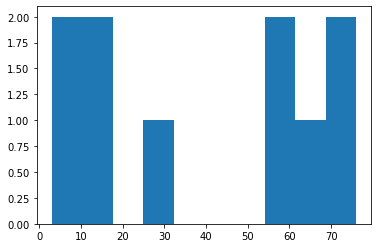

In [8]:
plt.hist(x)

In [9]:
np.random.uniform(0,1000,1000)

array([921.04983929, 209.94573846, 381.83508007,  67.57701298,
       746.39345529, 913.5803294 , 721.49960454, 466.08155778,
        83.25450284, 719.48077583, 880.40971828, 542.28444   ,
       683.66384997, 455.56534899, 480.40658264, 577.48848428,
       632.01369565, 386.06669172, 403.26221219, 776.79096474,
       561.17077371, 588.79354161, 793.46186808, 318.59009755,
       615.35919007, 456.63344385, 420.80235537, 519.98309174,
       583.25019461, 491.94873843, 268.15981784, 428.2525993 ,
       259.48429901, 614.79956076, 387.79359659,  19.82003355,
       726.33277972, 400.44355704, 936.05641217, 452.9670567 ,
       981.40104333, 383.94247535, 910.35001112, 194.11921403,
       902.77710228, 648.25176582, 267.69580328, 677.49110011,
       316.83353105, 193.91690116, 636.95500071, 722.33869412,
       637.13005274, 198.0365525 , 950.88592889, 648.61902812,
       214.73707048, 233.17827569, 432.80178398, 606.66580222,
       441.18681878, 230.86986447, 160.73155412, 221.68

In [10]:
x = np.random.uniform(0,1000,10000)

(array([ 970., 1074.,  974., 1005.,  966.,  972., 1021., 1022., 1044.,
         952.]),
 array([1.16752633e-02, 1.00006766e+02, 2.00001857e+02, 2.99996948e+02,
        3.99992039e+02, 4.99987130e+02, 5.99982221e+02, 6.99977311e+02,
        7.99972402e+02, 8.99967493e+02, 9.99962584e+02]),
 <BarContainer object of 10 artists>)

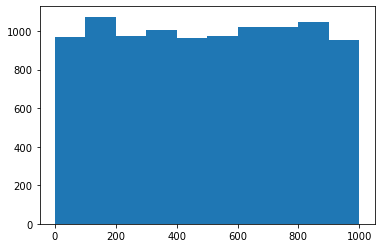

In [11]:
plt.hist(x)

In [12]:
x = np.random.normal(10, 100, 1000)

(array([ 13.,  34.,  98., 181., 230., 223., 140.,  61.,  14.,   6.]),
 array([-273.43989995, -212.97732763, -152.5147553 ,  -92.05218298,
         -31.58961066,   28.87296167,   89.33553399,  149.79810632,
         210.26067864,  270.72325097,  331.18582329]),
 <BarContainer object of 10 artists>)

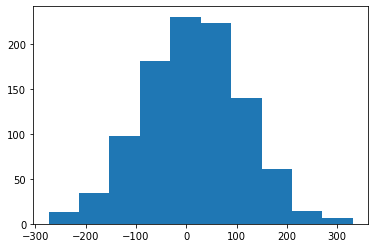

In [13]:
plt.hist(x)

# Numpy Random Tutorial

[Youtube Video](https://www.youtube.com/watch?v=Eu-GfO9Lj_E)

In [14]:
r.rand(1)

array([0.66135225])

In [15]:
r.randn(2,2)

array([[-1.17682545,  2.30065195],
       [ 0.81154398, -0.11865695]])

In [16]:
r.randint(10)

2

In [17]:
r.randint(10, 100)

28

In [18]:
r.randint(10, 100, size = (10,10))

array([[13, 14, 24, 87, 39, 73, 72, 47, 81, 10],
       [63, 48, 34, 74, 29, 39, 61, 32, 71, 22],
       [68, 70, 88, 69, 87, 82, 33, 95, 41, 50],
       [14, 39, 41, 97, 62, 67, 95, 45, 52, 26],
       [70, 27, 14, 51, 99, 14, 99, 39, 47, 40],
       [49, 40, 13, 12, 55, 78, 32, 34, 73, 14],
       [39, 61, 58, 48, 81, 50, 98, 11, 16, 12],
       [72, 28, 25, 42, 75, 38, 21, 79, 46, 24],
       [24, 42, 74, 68, 78, 55, 63, 48, 81, 27],
       [69, 23, 24, 82, 48, 62, 40, 35, 80, 98]])

In [19]:
a = np.array([1,2,3,4,5,6,7,8,9])

In [20]:
r.choice(a,5)

array([4, 7, 8, 5, 5])

In [21]:
r.choice(a,5, replace = False)

array([1, 8, 4, 9, 2])

# Distributions

### Uniform Distributions

[Offical Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform)

When looking through the differnt types of distrubutions I began to frighten myself again so I began with what looked like the easiest distribution to explain - The Uniform Distribution.

Uniform distribution is a probability distribution where each value within a certin range is equally likly to occur and values outside the range never occur[[8]](https://www.youtube.com/watch?v=uial-2girHQ)

Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.[[9]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform)

In [22]:
#Remove hashtag from line below and run cell for help from python on uniform distributions
# help(np.random.uniform)

In [23]:
# Generating Random Uniform Data - floating numbers between 1 and 10
# 1,2 or 3 arrays of data with 3 "rows" and 5 "columns"
x = np.random.uniform(1,10,size = (5,3,2))
print(x)

[[[2.91706062 7.93722364]
  [1.93269753 5.39422094]
  [9.87104023 6.59963382]]

 [[3.04526067 1.71485001]
  [8.50752377 5.98836686]
  [5.85723302 2.33080277]]

 [[6.96701121 4.21116486]
  [1.88575437 9.32563769]
  [3.84254749 5.78152363]]

 [[9.94508548 5.95482294]
  [6.86948528 9.71008772]
  [4.06721418 8.10370493]]

 [[8.93518618 9.10390026]
  [7.04521763 3.4237795 ]
  [9.53609263 9.34837533]]]


You can use this to generate datasets of all sizes with random numbers and these can then be broken down into smaller arrays, depending on how you have reqested the uniform function to display the data - you can play with the figures after size to see what I mean here
```
x = np.random.uniform(1,10,size = (5,3,2))
print(x)
```
For example the above will generate 1 multi-dimensional large array with all the data (Floating numbers beteween 1-10, 5 smaller arrays each containing 3 arrays with 2 values in each. This is very easily manipulated and someone could quickly generate a sample numerial data set using real world parameters and run test cases on that data - this can be used in a varity of ways from statistical sampling, medical testing, computer simulation and even gambling. 

Visualising the data also fairly easy - if every number is equally likly to be generated, then the distrbuition should be flat - as seen below.

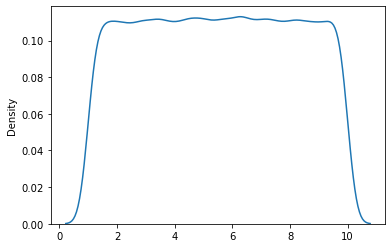

In [24]:
# Visualising Random Data (100000 numbers between 1 and 10)

# A kernel density estimate (KDE) plot is a method for visualizing the distribution
#of observations in a dataset, analagous to a histogram. KDE represents the data using 
#a continuous probability density curve in one or more dimensions.
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(r.uniform(1,10, size=100000))
plt.show()

As you can see from the plot above the distribution of the generated numbers is pretty evenly spread out over the parameters I have passed it, similar quantity of 1s 2s 3s and so on. However be careful - the less numbers you have and the wider the distribution values the more uneven the "Uniform" data may become. The bigger number of values you look for the more even the plot will become.

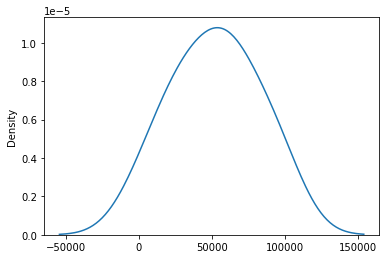

In [25]:
sns.kdeplot(r.uniform(1,100000, size=10))
plt.show()

The Code above is not a good example of uniform distribution as the varience is too wide (between 1 and 100000) and only looking for 10 values - if all are as likely to come up as another this means that you may come back with distintly different looking plots every time you run it!! So better to spot check the data structure behind the plot before deciding to use uniform for all your number generation needs.

### BINOMIAL DISTRBUTION 
 Binomial distribution is the outcome of binary scenarios, for example the toss of a coin. It is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters.The distribution is obtained by performing a number of Bernoulli trials. [[6]](https://www.geeksforgeeks.org/python-binomial-distribution/). It can be thought of as the pobability of a success or failure outcome in an experiment or survey that is repeated multiple times. 
 There are a number of criteria that need to be met for the Binomial distribution to work
 - There must be only 2 possible outcomes.(Success or Failure)
 - Each outcome has a fixed probability of occurring. A success has the probability of p, and a failure has the probability of 1 – p.
 - Each trial is completely independent of all others and probability of success is exactly the same in each event.
 
 The binomial random variable represents the number of successes(r) in n successive independent trials of a Bernoulli experiment[[7]](https://www.geeksforgeeks.org/python-binomial-distribution/)
 
 The binomial distribution formula is:
 
![](probability-distributions0x.png)  
  
 x = total number of "successess"  
 P = probability of a success in an individual trial  
 n = number of trials
 
 size  = The shape of the returned array
 
 Binomial Distribution can also be defined as Discrete Distribution - for example a coin toss is discrete as the results can only be heads or tails - however if you were taking the speed of cars on a motorway it would be differnt every time - 80kmph, 82kmph, 85kmph, 90kmph ..... and so on.

 

In [26]:
# number of trials 10
# probability is .5
#shape of array 10
# This can represent tossing a coin

x = r.binomial(n=10, p=0.5, size = 10)
print(x)

[4 6 6 4 3 4 3 7 1 6]


##### Visualisation of Binomial Distribution

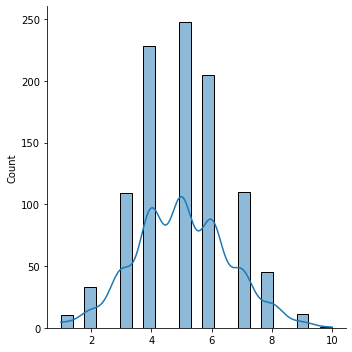

In [27]:
# Probability is 50%
sns.displot(r.binomial(n=10, p=0.5, size = 1000), kde=True)

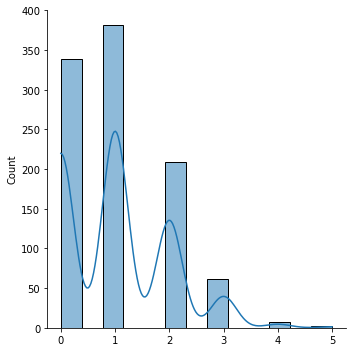

In [28]:
# Probability is 10%
sns.displot(r.binomial(n=10, p=0.1, size = 1000), kde=True)

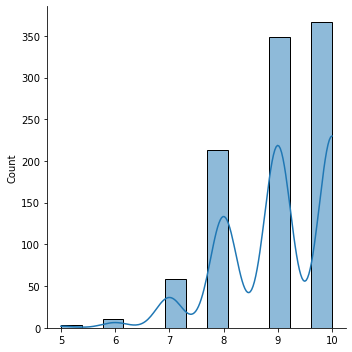

In [29]:
# Probability is 90%
sns.displot(r.binomial(n=10, p=0.9, size = 1000),kde=True)

##### Binomal vs normal  
The difference between normal and binomial distribution is that normal is contineous where as binomial is discrete. However if there are enough data points the plots can be very similar depending on location and scale.

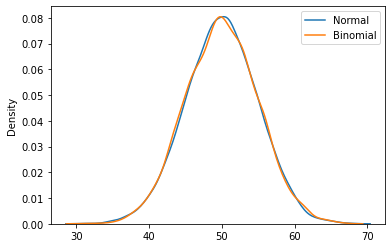

In [30]:
#Normal distribution
sns.kdeplot(r.normal(loc = 50, scale = 5, size = 10000), label = 'Normal')
#Binomial distribution
sns.kdeplot(r.binomial(n = 100, p = 0.5, size = 10000), label = 'Binomial')
plt.legend()

# The Poisson Distribution 

https://www.youtube.com/watch?v=cPOChr_kuQs

The Poission Distribution is a discrete distribution - similar to the binomial distribution, which is one in which the data can only take on certain values, for example integers.  
It describes the number of events occuring in a fixed time interval or "region of oppertunity".  
Simple example is how many customers did a shop have in a given hour.  
An interesting thing about the the Poisson Distribution is it requires only one paramaeter - The expected number of events during the time interval - lambda. 

![](lambda.PNG)

The Possion Distribution is bounded by 0 to Infinity

### Assumptions of the Poisson Distribution

 - The Rate at which events occur is constant. (ie. The pobability of an event occuring in a certain time interval should be exactly the same for every other time interval of that same length.)
 - The occurence of one event should not affect the occurence of a subsequent event (ie. Each trial is completely independent of all others and probability of success is exactly the same in each event.)  

These assumptions are difficult to hold in reality. As even if we use simple example I gave above of customers in a shop in a given hour, the paramateters around one hour will not match the next. Maybe the shop gets busier a lunch time, or it is buiser on Fridays because there is an event close by that increaseses customer footfall, or you sell a product that is seasonal so you are buiser at certain times of the year - the possible influences are endless!! 

### Probability Mass Function (PMF)
This is the probability of getting each of the discrete outcome.  

![](PMF.PNG)  

This is how this would look if:  
lambda = 3 (expected number of events)(NB - There is no requirement for lambda to be a whole number)  
What is the probability of 5 events  

![](PMFE.PNG) 

### Poisson distribution in Numpy


https://www.youtube.com/watch?v=dGhDzCJryGA

In [31]:
# Call the poisson random distribution with lambda is 5 with 3 draws
np.random.poisson(5,3)

array([ 5, 10,  4])

In [32]:
# using the unbiased varience
# If the averge number of events in a given time period is 1
# if you draw that a million times you will get very close to 1
np.var(np.random.poisson(1,1000000),ddof = 1)

0.9998779832369831

### Visualisation of Poisson distribution

See example below where if you draw a million samples where lambda is 1 the overwhelming majority of events will be between 0 and 2 and will steeply drop off the further right you go on the x axis.

(array([3.68072e+05, 3.67083e+05, 1.84059e+05, 6.17450e+04, 0.00000e+00,
        1.53350e+04, 3.11000e+03, 5.15000e+02, 7.10000e+01, 1.00000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

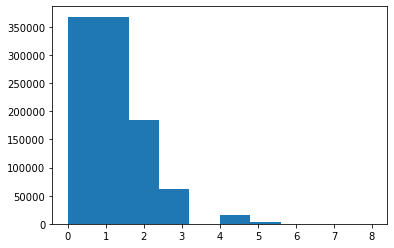

In [33]:
plt.hist(np.random.poisson(1,1000000))

### Normal Distribution vs Poisson Distribution

Normal distribution is continous whereas poisson is discrete.  
But we can see that similar to binomial for a large enough poisson distribution it will become similar to normal distribution with certain std dev and mean.[[9]](https://www.w3schools.com/python/numpy/numpy_random_poisson.asp)

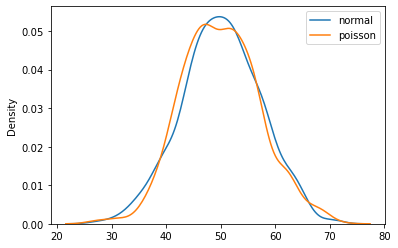

In [34]:
# Normal distribution
sns.kdeplot(r.normal(loc=50, scale=7, size=1000), label='normal')
# Poisson distribution
sns.kdeplot(r.poisson(lam=50, size=1000), label='poisson')
plt.legend()
plt.show()

### Poisson Distribution vs Binomial Distribution


The difference is very subtle it is that, binomial distribution is for discrete trials, whereas poisson distribution is for continuous trials.

But for very large n and near-zero p binomial distribution is near identical to poisson distribution such that n * p is nearly equal to lam.[[10]](https://www.w3schools.com/python/numpy/numpy_random_poisson.asp)

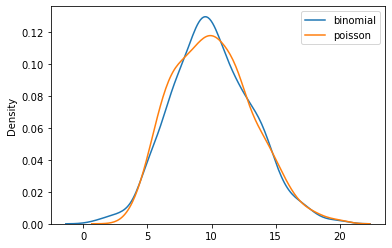

In [39]:
sns.kdeplot(r.binomial(n=1000, p=0.01, size=1000), label='binomial')
sns.kdeplot(r.poisson(lam=10, size=1000), label='poisson')
plt.legend()
plt.show()